# Problem Statement:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers' annual spending on 6 different varieties of products 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import iqr
import statistics as stat
from statistics import stdev

In [2]:
df=pd.read_csv("Wholesale+Customers+Data.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


Perform some measures of descriptive stats

In [5]:
df.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [7]:
df.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [8]:
row, col = df.shape
print("There are total {}".format(row),"rows and {}".format (col),"columns in the dataset")


There are total 440 rows and 9 columns in the dataset


In [9]:
df.dtypes

Buyer/Spender        int64
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicatessen         int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [11]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

array([[<AxesSubplot:title={'center':'Buyer/Spender'}>,
        <AxesSubplot:title={'center':'Fresh'}>,
        <AxesSubplot:title={'center':'Milk'}>],
       [<AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>,
        <AxesSubplot:title={'center':'Detergents_Paper'}>],
       [<AxesSubplot:title={'center':'Delicatessen'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

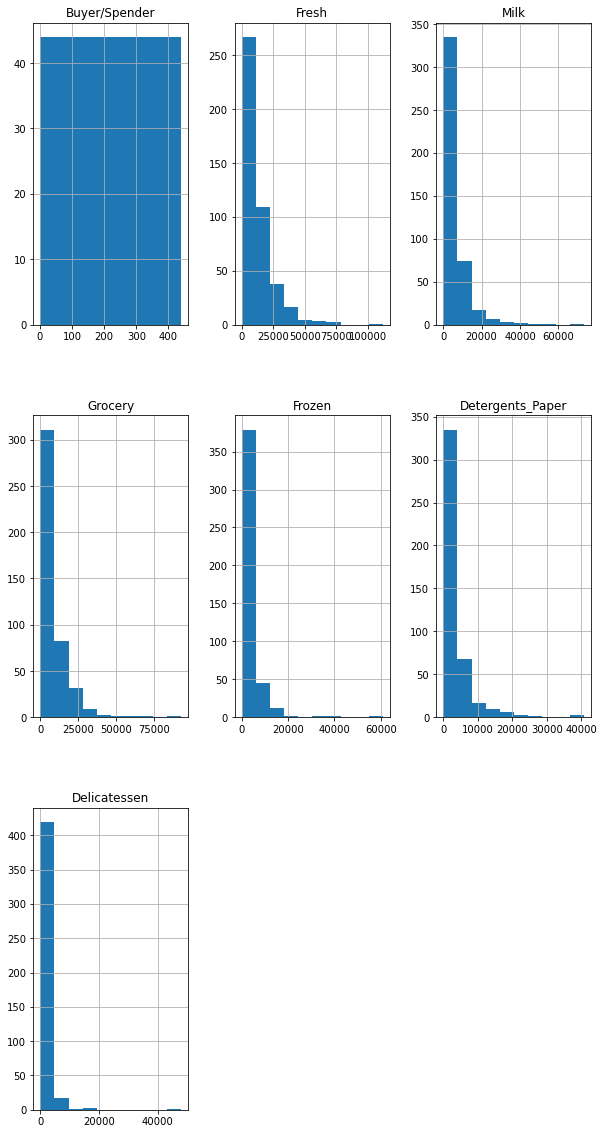

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist( figsize=(10,20))

<AxesSubplot:>

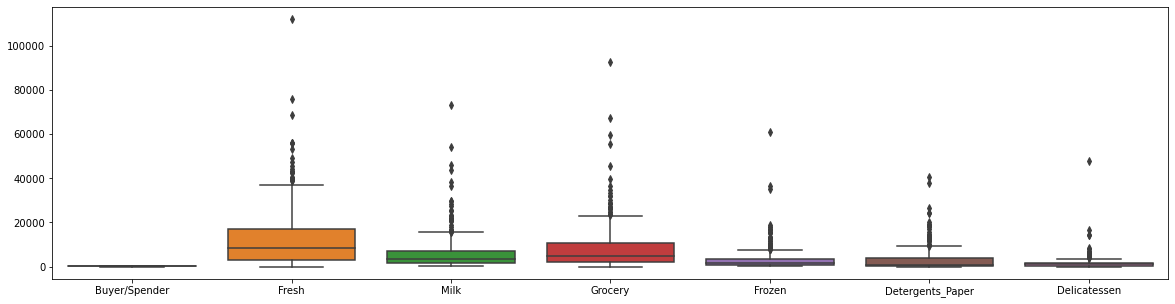

In [13]:

plt.figure(figsize= (20,5))
sns.boxplot(data=df)

In [14]:
pd.crosstab(df['Region'],df['Channel'] )

Channel,Hotel,Retail
Region,,
Lisbon,59,18
Oporto,28,19
Other,211,105


In [15]:
pd.crosstab(df['Channel'],df['Region'] )

Region,Lisbon,Oporto,Other
Channel,,,
Hotel,59,28,211
Retail,18,19,105


<AxesSubplot:xlabel='Region', ylabel='count'>

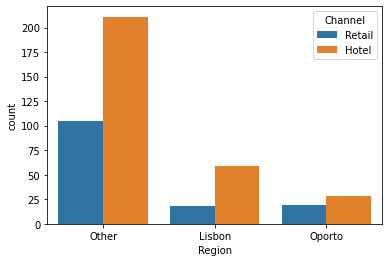

In [16]:
sns.countplot(x="Region", hue="Channel", data=df)

In [17]:
pd.pivot_table(df, index=['Buyer/Spender', 'Region'],
                     columns=[ 'Channel'])

Delicatessen         Detergents_Paper             Fresh  \
Channel                     Hotel  Retail            Hotel   Retail    Hotel   
Buyer/Spender Region                                                           
1             Other           NaN  1338.0              NaN   2674.0      NaN   
2             Other           NaN  1776.0              NaN   3293.0      NaN   
3             Other           NaN  7844.0              NaN   3516.0      NaN   
4             Other        1788.0     NaN            507.0      NaN  13265.0   
5             Other           NaN  5185.0              NaN   1777.0      NaN   
...                           ...     ...              ...      ...      ...   
436           Other        2204.0     NaN            182.0      NaN  29703.0   
437           Other        2346.0     NaN             93.0      NaN  39228.0   
438           Other           NaN  1867.0              NaN  14841.0      NaN   
439           Other        2125.0     NaN            168.0      NaN  10290.0   
440           Other          52.0     NaN            477.0      NaN   2787.0   

                                Frozen          Grocery              Milk  \
Channel                Retail    Hotel  Retail    Hotel   Retail    Hotel   
Buyer/Spender Region                                                        
1             Other   12669.0      NaN   214.0      NaN   7561.0      NaN   
2             Other    7057.0      NaN  1762.0      NaN   9568.0      NaN   
3             Other    6353.0      NaN  2405.0      NaN   7684.0      NaN   
4             Other       NaN   6404.0     NaN   4221.0      NaN   1196.0   
5             Other   22615.0      NaN  3915.0      NaN   7198.0      NaN   
...                       ...      ...     ...      ...      ...      ...   
436           Other       NaN  13135.0     NaN  16027.0      NaN  12051.0   
437           Other       NaN   4510.0     NaN    764.0      NaN   1431.0   
438           Other   14531.0      NaN   437.0      NaN  30243.0      NaN   
439           Other       NaN   1038.0     NaN   2232.0      NaN   1981.0   
440           Other       NaN     65.0     NaN   2510.0      NaN   1698.0   

                               
Channel                Retail  
Buyer/Spender Region           
1             Other    9656.0  
2             Other    9810.0  
3             Other    8808.0  
4             Other       NaN  
5             Other    5410.0  
...                       ...  
436           Other       NaN  
437           Other       NaN  
438           Other   15488.0  
439           Other       NaN  
440           Other       NaN  

[440 rows x 12 columns]

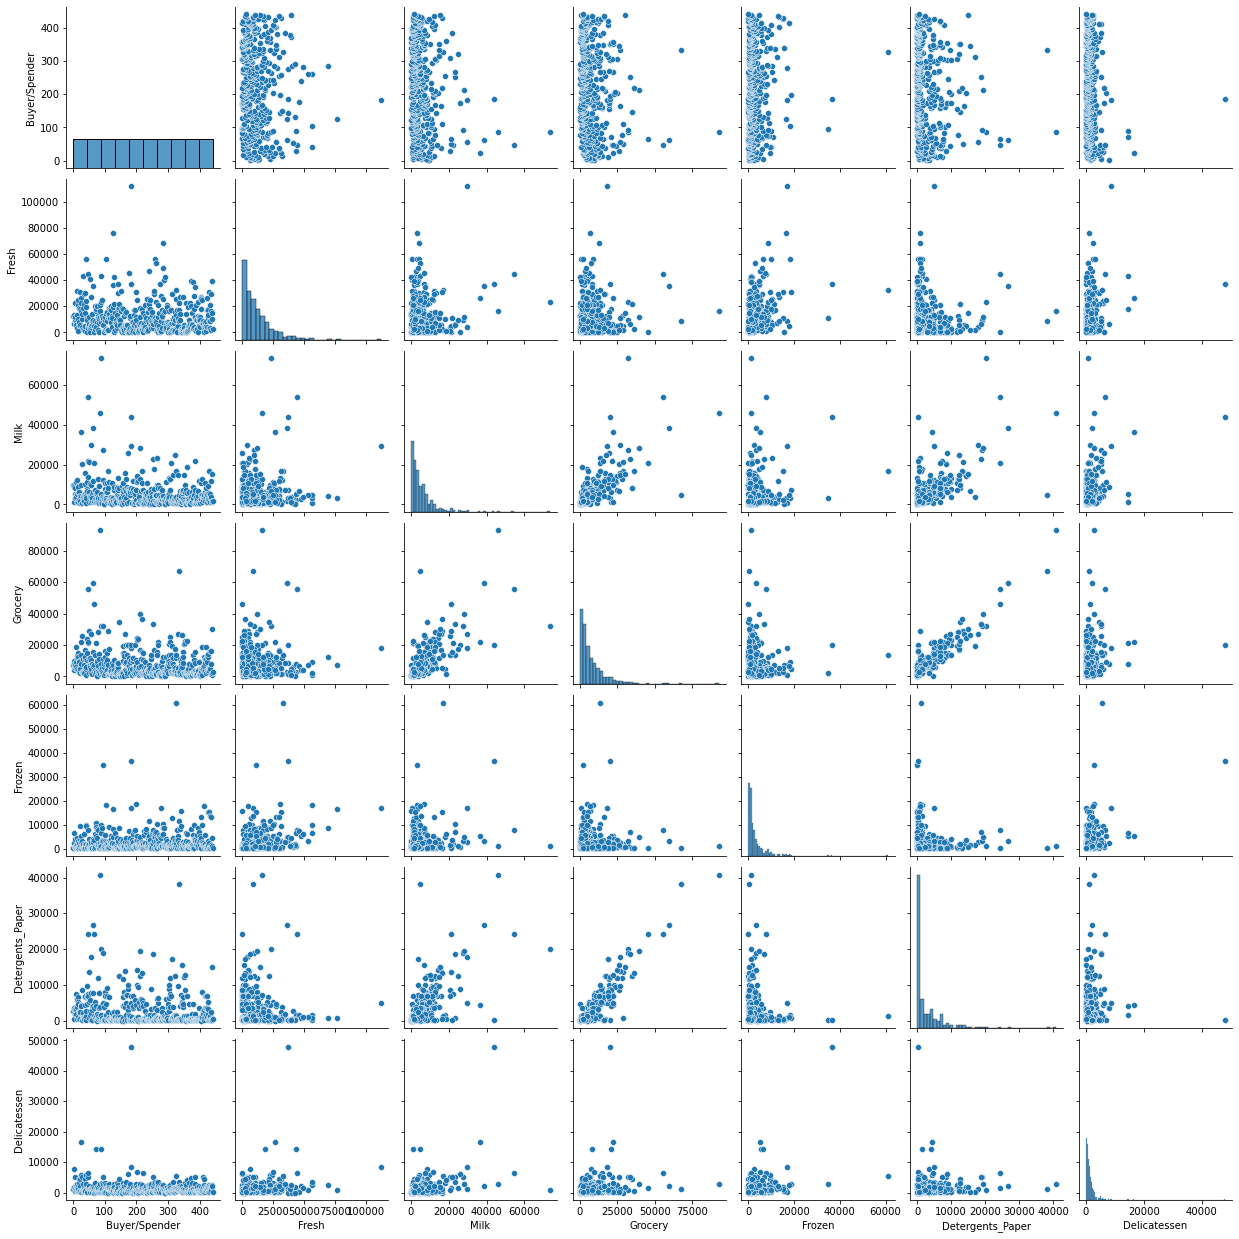

In [18]:
sns.pairplot(df)

In [19]:
df['Milk'].mean()

5796.265909090909

In [20]:
df['Milk'].std()

7380.377174570843

In [21]:
corr= df.corr()
corr

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Now calculate median for all the variables

The "median" is the "middle" value in the sorted list of numbers.

In [22]:
# Median
#columns= ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
medl = np.median(df['Fresh'])
print("The Median of Fresh is {}".format(medl)) 
med2 = np.median(df['Milk'])
print("The Median of Milk is {}".format(med2)) 
med3 = np.median(df['Grocery'])
print("The Median of Grocery is {}".format(med3))
med4 = np.median(df['Frozen'])
print("The Median of Frozen is {}".format(med4))
med5 = np.median(df['Detergents_Paper'])
print("The Median of Detergents_Paper is {}".format(med5))
med6 = np.median(df['Delicatessen'])
print("The Median of Delicatessen is {}".format(med6))


The Median of Fresh is 8504.0
The Median of Milk is 3627.0
The Median of Grocery is 4755.5
The Median of Frozen is 1526.0
The Median of Detergents_Paper is 816.5
The Median of Delicatessen is 965.5


The above results shows that the median of the data is same as the 50th percetile of the dataset. Since the mean and median of six variables are not same and there is very huge difference, when can say that the variables are highly skewed.

Mode Calculation


The "mode" is the value that occurs most often.

Since all the variables except Region and Channel is uniuqe numerical values, there will be no mode. We can find the mode of Region and Channel


In [23]:
# Mode
from statistics import mode 
modl = mode(df['Region'])
print("The most often occuring value (mode) of Region is {}".format(modl)) 
mod2 = mode(df['Channel'])
print("The most often occuring value (mode) of Channel is {}".format(mod2))



The most often occuring value (mode) of Region is Other
The most often occuring value (mode) of Channel is Hotel


The most often occuring value (mode) of Region is Other The most often occuring value (mode) of Channel is Hotel


Now, let us check the the different observations and the counts of each of these observations under the variables "Region" and "Channel".

In [24]:
df["Region"].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

There are 47 observations of Oporto, 77 for Lisbon and 316 for Other Regions.

In [25]:
df["Channel"].value_counts() 

Hotel     298
Retail    142
Name: Channel, dtype: int64

There are 142 observations of Retail and 298 for Hotel Channel.

Now, we will create a new column of total of spendings by 6 different varieties

In [26]:
df["Total"]=df.sum(axis=1)
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34113
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33268
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36613
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27385
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46105


Create barplot to check the spending as per Channel

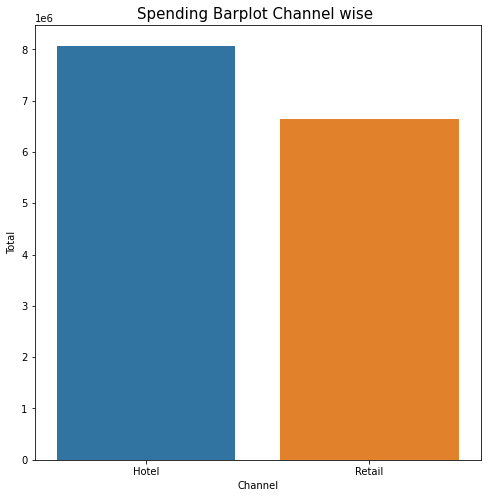

In [28]:



plt.figure(figsize=(8, 8))
ChannelAggregated = pd.DataFrame(df.groupby(["Channel"],sort=True)["Total"].sum()).reset_index()
b = sns.barplot(x="Channel", y="Total", data=ChannelAggregated)
b.set_title("Spending Barplot Channel wise ",fontsize=15)
plt.show()


From the above barplot, we can see that Hotel Channel is spending the highest and Retail Channel is spending the least

In [ ]:
#Now drop the Total column
#df.drop('Total',axis=l, inplace=True)

There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

We will subset the dataset with respect to region and channel

In [32]:
#Channel wise data subset
Retail= df[df['Channel'] == "Retail"] 
Hotel= df[df['Channel'] == "Hotel"]


To check the behaivour of the varities, we will do the descriptive analytics

In [33]:
Retail.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46802.232394
std,132.136132,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047,29327.840527
min,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000,15090.000000
25%,61.250000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000,30331.500000
50%,166.500000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000,37382.000000
75%,303.750000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000,51968.750000
max,438.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000,199977.000000


In [34]:
# Region wise data subset
Lisbon = df[df['Region'] == "Lisbon"] 
Oporto= df[df['Region'] == "Oporto"] 
Other= df[df['Region'] == "Other"]


In [35]:
Lisbon.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,31232.571429
std,22.371857,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340,20321.226622
min,197.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000,5129.000000
25%,216.000000,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000,17432.000000
50%,235.000000,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000,25603.000000
75%,254.000000,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000,38915.000000
max,273.000000,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000,107367.000000


In [36]:
Lisbon.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
196,197,Hotel,Lisbon,30624,7209,4897,18711,763,2876,65277
197,198,Retail,Lisbon,2427,7097,10391,1127,4314,1468,27022
198,199,Hotel,Lisbon,11686,2154,6824,3527,592,697,25679
199,200,Hotel,Lisbon,9670,2280,2112,520,402,347,15531
200,201,Retail,Lisbon,3067,13240,23127,3941,9959,731,54266


In [37]:
Oporto.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33403.978723
std,13.711309,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841,24236.358286
min,294.000000,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000,4457.000000
25%,305.500000,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000,20932.000000
50%,317.000000,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000,27259.000000
75%,328.500000,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000,36484.000000
max,340.000000,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000,131203.000000


In [38]:
Other.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33992.484177
std,143.615303,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660,27925.091509
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1059.000000
25%,79.750000,3350.750000,1634.000000,2141.500000,664.750000,251.250000,402.000000,17386.750000
50%,158.500000,8752.500000,3684.500000,4732.000000,1498.000000,856.000000,994.000000,28316.500000
75%,361.250000,17406.500000,7198.750000,10559.750000,3354.750000,3875.750000,1832.750000,42800.000000
max,440.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000,199977.000000


On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? Which items shows the least inconsistent behaviour?

Descriptive measures of variability is used to describe the amount of variability or spread in a set of data. The most common measures of variability are the range, the interquartile range (IQR), variance, standard deviation and coefficient of variation. We will use coefficient of variation.

The coefficient of variation (CV) is a statistical measure of the dispersion of data points in a series around the mean. It is a useful statistic for comparing the degree of variation from one data series to another, even if the means are very different from one another.


This measure is the most appropriate measure for the current scenario

CV= o/µ

o=standard deviation 
µ=mean


In [39]:
from scipy.stats import variation
cols=[ 'Fresh',  'Milk',  'Grocery',  'Frozen','Detergents_Paper', 'Delicatessen']
for i in cols:
    print('The Coefficient of Variation for {} is {}'.format(i,round(variation(df[i]),3)))    


The Coefficient of Variation for Fresh is 1.053
The Coefficient of Variation for Milk is 1.272
The Coefficient of Variation for Grocery is 1.194
The Coefficient of Variation for Frozen is 1.579
The Coefficient of Variation for Detergents_Paper is 1.653
The Coefficient of Variation for Delicatessen is 1.847


Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In statistics, an outlier is an observation point that is distant from other observations.

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles.

C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\ac\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaco

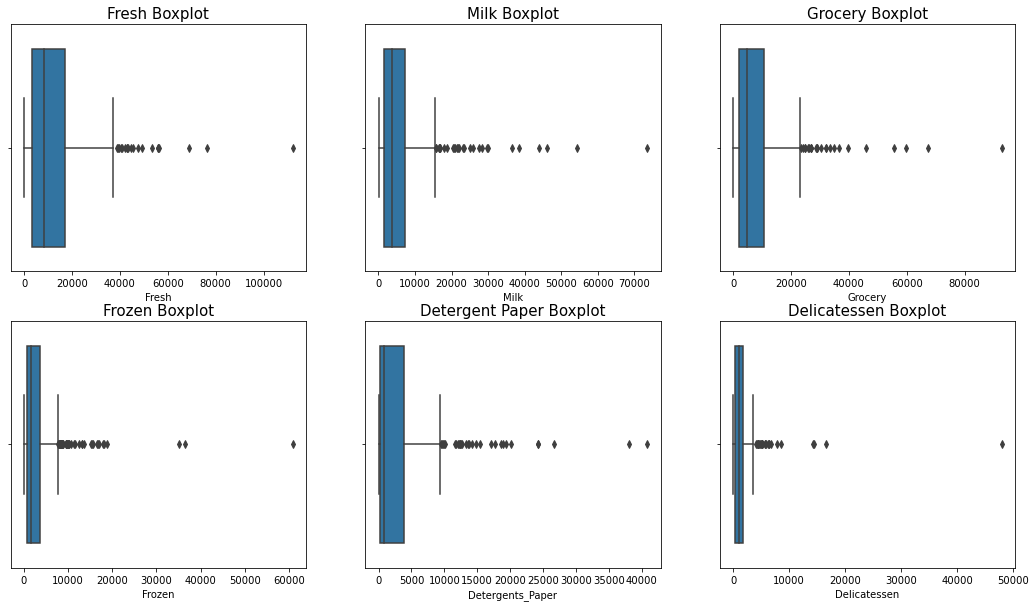

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=3) 
fig.set_size_inches(18, 10)

a = sns.boxplot(data=df, x="Fresh", orient="v", ax=axes[0][0])
a.set_title("Fresh Boxplot", fontsize=15)

b = sns.boxplot(data=df, x="Milk", orient="v", ax=axes[0][1]) 
b.set_title("Milk Boxplot", fontsize=15)
 

c = sns.boxplot(data=df, x="Grocery", orient="v", ax=axes[0][2])
c.set_title("Grocery Boxplot", fontsize=15)
 

d = sns.boxplot(data=df, x="Frozen", orient="v", ax=axes[1][0])
d.set_title("Frozen Boxplot", fontsize=15)
 


e = sns.boxplot(data=df, x="Detergents_Paper", orient="v", ax=axes[1][1])
e.set_title("Detergent Paper Boxplot", fontsize=15)

 

f = sns.boxplot(data=df, x="Delicatessen", orient="v", ax=axes[1][2])
f.set_title("Delicatessen Boxplot", fontsize=15)
 

plt.show()
